### Importing Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\09-2025 Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

#### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### Determine whether there’s a difference in spending habits between the different U.S. regions.

In [4]:
# Define region groups
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
midwest = ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia',
         'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

In [5]:
# Create region column
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [6]:
ords_prods_cust_merged['region'] = ords_prods_cust_merged['state'].apply(assign_region)

In [8]:
#check
ords_prods_cust_merged['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
ords_prods_cust_merged['loyalty_flag'].value_counts()

loyalty_flag
New Customer        15785728
Regular Customer    13212690
Loyal Customer       3406441
Name: count, dtype: int64

In [12]:
# Compare loyalty by Region
region_loyalty = pd.crosstab(ords_prods_cust_merged['region'], ords_prods_cust_merged['loyalty_flag'], normalize='index') * 100

In [13]:
region_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
region,,,
Midwest,10.173857,49.066915,40.759228
Northeast,10.626438,48.520079,40.853483
South,10.497462,48.726631,40.775907
West,10.762238,48.508371,40.729391


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

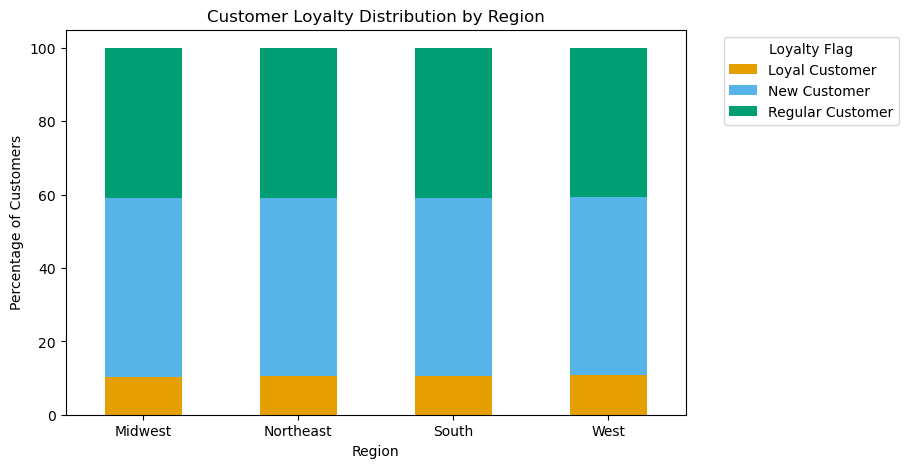

In [21]:
stacked_b = region_loyalty.plot(
    kind='bar',
    stacked=True,
    color=['#E69F00', '#56B4E9', '#009E73'],  # CUD color-blind friendly palette
    figsize=(8,5)
)

plt.title('Customer Loyalty Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Loyalty Flag', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)  # Keep region names horizontal

In [23]:
save_path = r'C:\Users\ophab\Desktop\JESSICA\Careerfoundry JEJE\Data Immersion\09-2025 Instacart Basket Analysis\04 Analysis\Visualizations'

In [24]:
# Export the figure
stacked_b.figure.savefig(os.path.join(save_path, 'stacked_bar_region_loyalty.png'))

plt.show()

##### To explore differences in customer behavior across geographic areas, I created a “region” column based on the state of each customer. I then analyzed the distribution of loyalty levels within each U.S. region using a crosstab of the region and loyalty_flag columns, expressed as percentages. This allowed me to compare the proportion of New, Regular, and Loyal Customers across regions. For clarity and accessibility, I ensured that the visualizations were colorblind-friendly, making it easier for all stakeholders to interpret the differences in loyalty patterns across regions. This approach highlights regional variations in customer behavior while keeping the visuals readable and informative.

#### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
#Create an exclusion flag
ords_prods_cust_merged['low_activity_flag'] = ords_prods_cust_merged['max_order'] < 5

In [17]:
#Exclude low-activity customers
ords_prods_cust_active = ords_prods_cust_merged[ords_prods_cust_merged['low_activity_flag'] == False]

In [18]:
#Export the filtered dataset
ords_prods_cust_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_active.pkl'))

In [19]:
#check
ords_prods_cust_active['low_activity_flag'].value_counts()

low_activity_flag
False    30964564
Name: count, dtype: int64

##### To focus on customers who generate meaningful revenue, I created a low_activity_flag for users with fewer than 5 orders. I then excluded these low-activity customers to produce a filtered dataset, which ensures that the analysis emphasizes users with significant purchasing behavior. This filtered sample was exported for further use and ensures that all downstream insights are based on active, revenue-generating customers.

In [25]:
# Create customer profile
def profile_customer(row):
    if row['n_dependants'] == 0 and row['age'] < 30:
        return 'Young Adult'
    elif row['n_dependants'] > 0 and row['age'] < 40:
        return 'Young Parent'
    elif row['n_dependants'] > 0 and row['age'] >= 40:
        return 'Older Parent'
    elif row['age'] >= 50:
        return 'Senior Adult'
    else:
        return 'Adult'

In [26]:
ords_prods_cust_merged['customer_profile'] = ords_prods_cust_merged.apply(profile_customer, axis=1)

In [27]:
#Check 
ords_prods_cust_merged['customer_profile'].value_counts()

customer_profile
Older Parent    15924994
Young Parent     8382362
Senior Adult     4047975
Adult            2536298
Young Adult      1513230
Name: count, dtype: int64

#### Create an appropriate visualization to show the distribution of profiles.

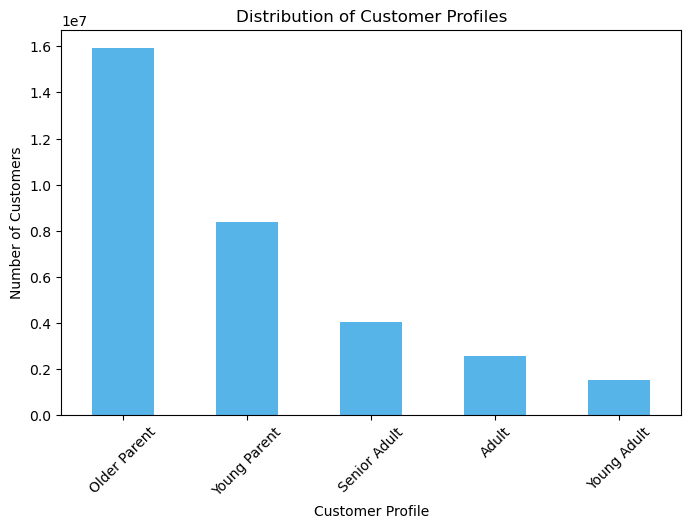

In [30]:
# Bar chart of customer profiles
profile_counts = ords_prods_cust_merged['customer_profile'].value_counts()
profile_plot = profile_counts.plot.bar(
    color='#56B4E9',  # single color for all bars
    figsize=(8,5)
)

plt.title("Distribution of Customer Profiles")
plt.xlabel("Customer Profile")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

In [31]:
profile_bar.figure.savefig(os.path.join(save_path, 'bar_customer_profiles.png'))
plt.close()

#### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [37]:
# Group by customer profile
profile_agg = ords_prods_cust_merged.groupby('customer_profile').agg(
    min_orders = ('max_order', 'min'),
    mean_orders = ('max_order', 'mean'),
    max_orders = ('max_order', 'max'),
    min_spending = ('prices', 'min'),
    median_spending = ('prices', 'median'),
    mean_spending = ('prices', 'mean'),
    max_spending = ('prices', 'max')
).reset_index()

In [38]:
profile_agg

,customer_profile,min_orders,mean_orders,max_orders,min_spending,median_spending,mean_spending,max_spending
0,Adult,3,33.074347,99,1.0,7.4,7.794186,25.0
1,Older Parent,1,32.865416,99,1.0,7.4,7.793105,25.0
2,Senior Adult,2,33.638434,99,1.0,7.4,7.793696,25.0
3,Young Adult,3,32.768324,99,1.0,7.3,7.772643,25.0
4,Young Parent,3,33.168374,99,1.0,7.4,7.787787,25.0


#### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [39]:
#Aggregate mean spending per profile per region
profile_region = ords_prods_cust_merged.groupby(['customer_profile','region'])['prices'].mean().unstack()
print(profile_region)

region             Midwest  Northeast     South      West
customer_profile                                         
Adult             7.793773   7.771481  7.804726  7.795543
Older Parent      7.792683   7.785415  7.796550  7.794394
Senior Adult      7.787027   7.801662  7.798022  7.788904
Young Adult       7.814765   7.766419  7.773282  7.737679
Young Parent      7.790573   7.773192  7.791134  7.790832


In [40]:
#Aggregate mean spending per profile per department
profile_department = ords_prods_cust_merged.groupby(['customer_profile','department_id'])['prices'].mean().unstack()
print(profile_department)

C:\Users\ophab\AppData\Local\Temp\ipykernel_9208\551854074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_department = ords_prods_cust_merged.groupby(['customer_profile','department_id'])['prices'].mean().unstack()


department_id            1         2         3         4         5         6  \
customer_profile                                                               
Adult             7.747118  6.944194  7.809828  7.993628  8.086529  7.682812   
Older Parent      7.733730  6.996403  7.862985  7.978833  8.177358  7.690042   
Senior Adult      7.751912  7.026564  7.827985  7.995968  8.029912  7.696395   
Young Adult       7.714017  6.788529  7.868960  7.973265  7.732633  7.592857   
Young Parent      7.735227  7.015187  7.859673  7.978164  8.223092  7.677201   

department_id            7         8         9        10  ...         12  \
customer_profile                                          ...              
Adult             7.675403  7.909770  7.377637  8.329114  ...  16.203054   
Older Parent      7.677639  7.843981  7.352336  8.364992  ...  16.312001   
Senior Adult      7.677007  7.877381  7.352502  8.335947  ...  16.295369   
Young Adult       7.651462  8.253268  7.281318  8.194907  .

In [41]:
profile_region_pct = ords_prods_cust_merged.groupby(['region','customer_profile'])['order_id'].count()
profile_region_pct = profile_region_pct.groupby(level=0).apply(lambda x: 100*x/x.sum()).unstack()
print(profile_region_pct)

customer_profile        Adult  Older Parent  Senior Adult  Young Adult  \
region    region                                                         
Midwest   Midwest    7.971187     49.148681     12.561053     4.545008   
Northeast Northeast  7.469452     49.584919     12.486615     4.827551   
South     South      7.988586     48.746405     12.269580     4.776005   
West      West       7.730999     49.352248     12.721416     4.536910   

customer_profile     Young Parent  
region    region                   
Midwest   Midwest       25.774072  
Northeast Northeast     25.631464  
South     South         26.219423  
West      West          25.658427  


Text(0.5, 36.72222222222221, 'Customer Profile')

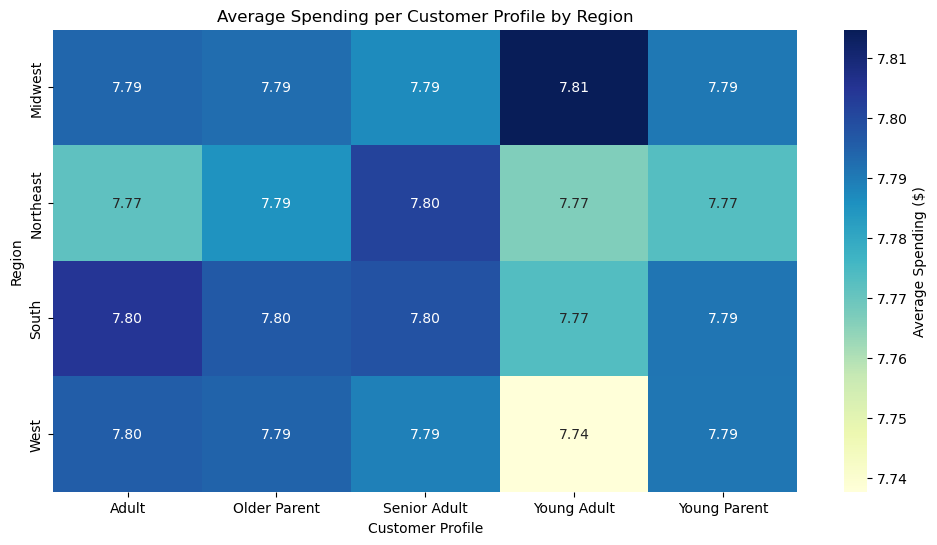

In [63]:
#Customer Profile vs Region

plt.figure(figsize=(12,6))
heatmap_region_profile = sns.heatmap(avg_spending_region, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label':'Average Spending ($)'})
plt.title('Average Spending per Customer Profile by Region')
plt.ylabel('Region')
plt.xlabel('Customer Profile')

In [64]:
# Export
heatmap_region_profile.figure.savefig(os.path.join(save_path, 'heatmap_avg_spending_region.png'))
plt.close()

In [47]:
# Map department_id to department names
dept_dict = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol',
    6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta',
    10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry',
    14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household',
    18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}

ords_prods_cust_merged['department'] = ords_prods_cust_merged['department_id'].map(dept_dict)

In [49]:
profile_dept_spending = ords_prods_cust_merged.groupby(
    ['customer_profile', 'department']
)['prices'].mean().unstack()

C:\Users\ophab\AppData\Local\Temp\ipykernel_9208\4010253313.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profile_dept_spending = ords_prods_cust_merged.groupby(


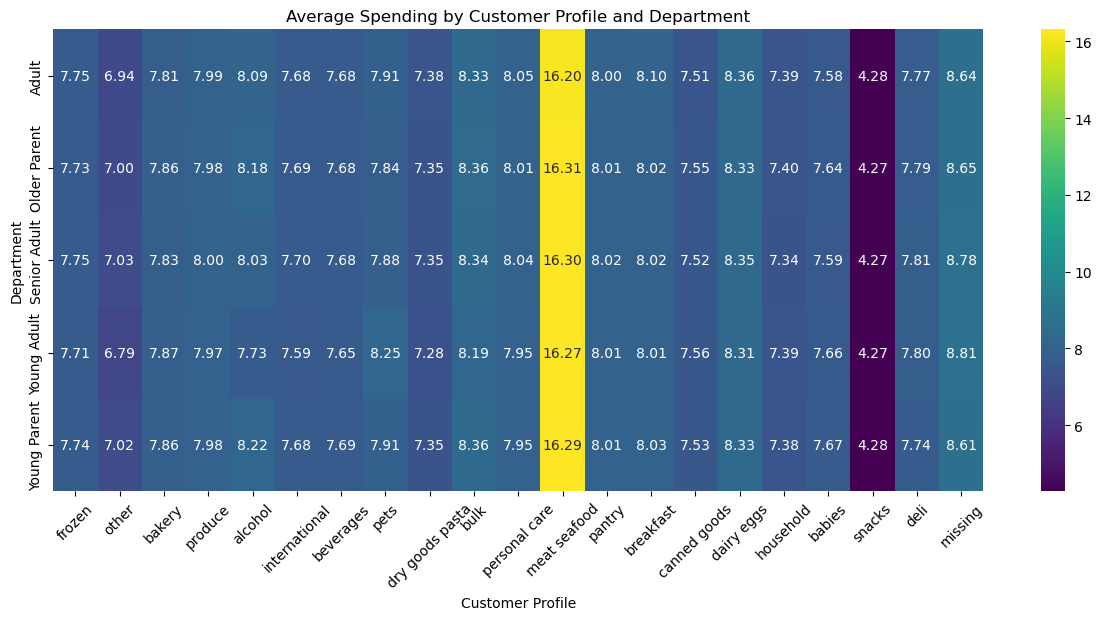

In [59]:
# Heatmap: Customer Profiles vs Departments
plt.figure(figsize=(15,6))
heatmap_profile_dept = sns.heatmap(profile_dept_spending, annot=True, fmt=".2f", cmap='viridis')
plt.title('Average Spending by Customer Profile and Department')
plt.xlabel('Customer Profile')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.show()

In [65]:
#Export
heatmap_profile_dept.figure.savefig(os.path.join(save_path, 'heatmap_profile_department.png'))
plt.close()

##### In this analysis, we explored how customer profiles vary across regions and departments to identify behavioral patterns. We calculated the average spending for each profile in each U.S. region and visualized it using a heatmap, which revealed that certain profiles, such as Young Parents, spend more in specific regions. We also examined the relationship between profiles and departments, which highlighted which types of products are preferred by different customer groups. These insights suggest that marketing strategies could be tailored to target the most active profiles in each region and product category, improving engagement and revenue. Color-blind friendly palettes were used to ensure clarity, and consistent figure saving practices were applied to keep all visualizations organized.

### Exporting final Data

In [67]:
ords_prods_cust_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_final.pkl'))